# Model Training

## 1. Load Preprocessed Dataset
- Load the preprocessed train, validation, and test datasets.

## 2. Define LeNet Model
- Define the LeNet architecture using TensorFlow/Keras.

## 3. Compile Model
- Compile the model with an appropriate optimizer, loss function, and metrics.

## 4. Train Model
- Train the model on the training dataset.
- Validate the model on the validation dataset.

## 5. Evaluate Model
- Evaluate the model on the test dataset.

## 6. Visualize Training History
- Plot training and validation loss and accuracy over epochs.

## 7. Save Model
- Save the trained model for future use.



## 1. Load Preprocessed Dataset
- Load the preprocessed train, validation, and test datasets.


In [65]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))
from src.utils import visualization_utils as vu
from src.utils import dataset_utils as du


import tensorflow as tf
import tensorflow_datasets as tfds

# prevent TensorFlow from allocating all the GPU memory at the start
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    for gpu in physical_devices:
        tf.config.experimental.set_memory_growth(gpu, True)

# Clear Keras session
import tensorflow.keras.backend as K
K.clear_session()

# Define data directories
base_dir = '/tf/projects/malaria-image-recognition/notebooks/'
data_dir = os.path.join(base_dir, 'data', 'raw')

# Load the dataset with TensorFlow Datasets without downloading
datasets, _info = tfds.load('malaria',
                            split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                            data_dir=data_dir,
                            shuffle_files=True,
                            download=True,  # Do not download the dataset again as already available in the localhost
                            as_supervised=True,
                            with_info=True)

train_dataset, val_dataset, test_dataset = datasets
# print(_info)

# Print five random samples
print('\n\n Random samples from train_dataset: \n\n')
du.print_sample_info(test_dataset)





 Random samples from train_dataset: 


Sample 1:
Image shape: (121, 124, 3)
Image size: 45012
Image dimensions: 3
Label: 0

Sample 2:
Image shape: (136, 121, 3)
Image size: 49368
Image dimensions: 3
Label: 0

Sample 3:
Image shape: (112, 106, 3)
Image size: 35616
Image dimensions: 3
Label: 1

Sample 4:
Image shape: (118, 118, 3)
Image size: 41772
Image dimensions: 3
Label: 1

Sample 5:
Image shape: (121, 127, 3)
Image size: 46101
Image dimensions: 3
Label: 1



2024-07-19 17:14:49.714796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [66]:
# Preprocess the dataset
train_dataset_preprocessed = du.preprocess_dataset(train_dataset, buffer_size=10000, batch_size=300)

# # After preprocessing
# print("After preprocessing:")
# print('\n\n Random samples from train_dataset after preprocessing:: \n\n')
# du.print_sample_info(train_dataset_preprocessed)

In [67]:
# Preprocess the dataset
val_dataset_preprocessed = du.preprocess_dataset(val_dataset, buffer_size=10000, batch_size=300)

# # After preprocessing
# print("After preprocessing:")
# print('\n\n Random samples from val_dataset after preprocessing:: \n\n')
# du.print_sample_info(val_dataset_preprocessed)

In [68]:
# Preprocess the dataset
test_dataset_preprocessed = du.preprocess_dataset(test_dataset, buffer_size=10000, batch_size=300)

# # After preprocessing
# print("After preprocessing:")
# print('\n\n Random samples from test_dataset after preprocessing:: \n\n')
# du.print_sample_info(test_dataset_preprocessed)


## 2. Define LeNet Model
- Define the LeNet architecture using TensorFlow/Keras.


In [77]:
# Model architecture
# Model definition and compilation

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, InputLayer, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import BinaryAccuracy


def lenet_model():
    model = tf.keras.Sequential([

        InputLayer(shape=(128, 128, 3)),
        
        Conv2D(6, (5, 5), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(.15),
        
        Conv2D(16, (5, 5), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(.25),
        
        tf.keras.layers.Flatten(),
                
        tf.keras.layers.Dense(120, activation='relu'),
        BatchNormalization(),
        Dropout(.5),
        
        tf.keras.layers.Dense(84, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        
        tf.keras.layers.Dense(1, activation='sigmoid') 
    ])

    model.compile(optimizer=Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=[BinaryAccuracy()])
    return model

model = lenet_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 124, 124, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 124, 124, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 62, 62, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 58, 58, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 58, 58, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 29, 29, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 13456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │     1,614,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 120)            │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 84)             │           336 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 84)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,865 (6.21 MB)

 Trainable params: 1,628,413 (6.21 MB)

 Non-trainable params: 452 (1.77 KB)


## 4. Train Model
- Define necessary callbacks 
- Train the model on the training dataset.
- Validate the model on the validation dataset.

In [78]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

# Define the callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1  # Set verbose to 1 to print messages
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1  # Set verbose to 1 to print messages
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.01,
    verbose=1  # Set verbose to 1 to print messages
)

tensorboard = TensorBoard(
    log_dir='./logs',
    histogram_freq=1,
    write_graph=True,
    write_images=True
)

# Fit the model with the callbacks
history = model.fit(
    train_dataset_preprocessed,
    epochs=20,
    verbose=1,
    validation_data=val_dataset_preprocessed,
    shuffle=True,
    callbacks=[early_stopping, model_checkpoint, reduce_lr, tensorboard]
)


Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - binary_accuracy: 0.6064 - loss: 0.7496
Epoch 1: val_loss improved from inf to 0.70090, saving model to best_model.keras
74/74 ━━━━━━━━━━━━━━━━━━━━ 77s 558ms/step - binary_accuracy: 0.6071 - loss: 0.7482 - val_binary_accuracy: 0.5693 - val_loss: 0.7009 - learning_rate: 0.0100
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - binary_accuracy: 0.8735 - loss: 0.3184
Epoch 2: val_loss did not improve from 0.70090
74/74 ━━━━━━━━━━━━━━━━━━━━ 26s 277ms/step - binary_accuracy: 0.8738 - loss: 0.3177 - val_binary_accuracy: 0.5555 - val_loss: 1.5570 - learning_rate: 0.0100
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - binary_accuracy: 0.9321 - loss: 0.1964
Epoch 3: val_loss improved from 0.70090 to 0.49125, saving model to best_model.keras
74/74 ━━━━━━━━━━━━━━━━━━━━ 32s 347ms/step - binary_accuracy: 0.9321 - loss: 0.1964 - val_binary_accuracy: 0.8001 - val_loss: 0.4913 - learning_rate: 0.0100
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s


## 5. Evaluate Model
- Evaluate the model on the test dataset.

In [79]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset_preprocessed)
print(f"Test accuracy: {test_accuracy}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - binary_accuracy: 0.9481 - loss: 0.1625 
Test accuracy: 0.951741635799408


## 6. Visualize Training History
- Plot training and validation loss and accuracy over epochs.


,binary_accuracy,loss,val_binary_accuracy,val_loss,learning_rate
0,0.662932,0.643590,0.569303,0.700902,0.01
1,0.896081,0.272155,0.555515,1.556952,0.01
2,0.930418,0.199073,0.800073,0.491254,0.01
3,0.939853,0.177008,0.902395,0.274377,0.01
4,0.945568,0.160435,0.932874,0.189434,0.01
5,0.942121,0.165870,0.925617,0.211124,0.01
6,0.949197,0.150938,0.877721,0.286082,0.01
7,0.950104,0.147264,0.943396,0.210431,0.01
8,0.950603,0.144198,0.945573,0.165752,0.01
9,0.953778,0.137211,0.946662,0.233322,0.01


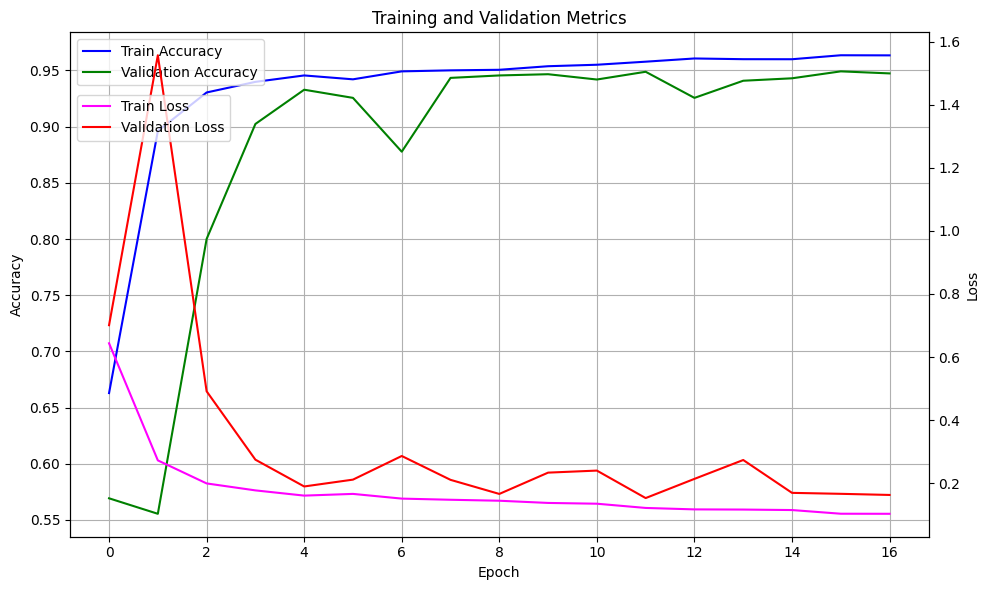

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Convert the history dictionary to a DataFrame
df = pd.DataFrame(data=history.history)
display(df)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot training and validation accuracy on the primary y-axis
ax1.plot(df['binary_accuracy'], label='Train Accuracy', color='blue')
ax1.plot(df['val_binary_accuracy'], label='Validation Accuracy', color='green')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='upper left', bbox_to_anchor=(0., 1))

# Create a second y-axis to plot training and validation loss
ax2 = ax1.twinx()
ax2.plot(df['loss'], label='Train Loss', color='magenta')
ax2.plot(df['val_loss'], label='Validation Loss', color='red')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper left', bbox_to_anchor=(0., 0.89))

# Add grid and title
ax1.grid(True, 'both')
plt.title('Training and Validation Metrics')

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()



## 7. Save Model
- Save the trained model for future use.


In [81]:
# Save the model in the native Keras format
model.save('/tf/projects/malaria-image-recognition/notebooks/cnn_malaria_image_model_batch_512.keras')

## Batch Size 16

In [1]:
# Model Training

## 1. Load Preprocessed Dataset

import os
import tensorflow as tf
import tensorflow_datasets as tfds

# Clear Keras session
import tensorflow.keras.backend as K
K.clear_session()

# Define data directories
base_dir = '/tf/notebooks/malaria-image-recognition/'
data_dir = os.path.join(base_dir, 'data', 'raw')

# Load the dataset with TensorFlow Datasets
datasets, _info = tfds.load('malaria',
                            split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                            data_dir=data_dir,
                            shuffle_files=True,
                            download=True,
                            as_supervised=True,
                            with_info=True,
                           )

train_dataset, val_dataset, test_dataset = datasets

# Define image preprocessing functions
def preprocess_image(image, label):
    image = tf.image.resize(image, [128, 128])  # Resize images
    image = image / 255.0  # Rescale images
    return image, label

# Apply preprocessing, batching, and prefetching
batch_size = 16

train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

val_dataset = val_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = test_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

import tensorflow as tf

def lenet_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = lenet_model()
model.summary()

from time import perf_counter

start = perf_counter()

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5)  # Adjust the number of epochs as necessary

end = perf_counter()

print(f"Time elapsed: {end-start:.4f} seconds")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")



2024-07-17 06:29:18.327970: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 06:29:18.350613: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 06:29:18.350658: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 06:29:18.364906: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-17 06:29:24.650802: I external/local_xla/xla

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 62, 62, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 29, 29, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,614,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,961 (6.21 MB)

 Trainable params: 1,627,961 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


I0000 00:00:1721197767.080492   17241 service.cc:145] XLA service 0x75b0b4003ed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721197767.080551   17241 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-17 06:29:27.264349: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-17 06:29:28.237076: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


  16/1378 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4708 - loss: 0.8888

I0000 00:00:1721197773.146853   17241 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1378/1378 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.6106 - loss: 0.6414 - val_accuracy: 0.9340 - val_loss: 0.1992
Epoch 2/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9460 - loss: 0.1661 - val_accuracy: 0.9336 - val_loss: 0.2007
Epoch 3/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.9587 - loss: 0.1299 - val_accuracy: 0.9409 - val_loss: 0.1781
Epoch 4/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.9702 - loss: 0.0914 - val_accuracy: 0.9448 - val_loss: 0.2364
Epoch 5/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.9812 - loss: 0.0584 - val_accuracy: 0.9438 - val_loss: 0.3136
Time elapsed: 165.2669 seconds
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9503 - loss: 0.2343
Test accuracy: 0.9502902626991272


## Batch Size 32

In [1]:
# Model Training

## 1. Load Preprocessed Dataset

import os
import tensorflow as tf
import tensorflow_datasets as tfds

# Clear Keras session
import tensorflow.keras.backend as K
K.clear_session()

# Define data directories
base_dir = '/tf/notebooks/malaria-image-recognition/'
data_dir = os.path.join(base_dir, 'data', 'raw')

# Load the dataset with TensorFlow Datasets
datasets, _info = tfds.load('malaria',
                            split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                            data_dir=data_dir,
                            shuffle_files=True,
                            download=True,
                            as_supervised=True,
                            with_info=True,
                           )

train_dataset, val_dataset, test_dataset = datasets

# Define image preprocessing functions
def preprocess_image(image, label):
    image = tf.image.resize(image, [128, 128])  # Resize images
    image = image / 255.0  # Rescale images
    return image, label

# Apply preprocessing, batching, and prefetching
batch_size = 32

train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

val_dataset = val_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = test_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

import tensorflow as tf

def lenet_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = lenet_model()
model.summary()

from time import perf_counter

start = perf_counter()

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5)  # Adjust the number of epochs as necessary

end = perf_counter()

print(f"Time elapsed: {end-start:.4f} seconds")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")



2024-07-17 07:07:25.636923: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 07:07:25.660793: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 07:07:25.660838: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 07:07:25.675186: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-17 07:07:31.372727: I external/local_xla/xla

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 62, 62, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 29, 29, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,614,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,961 (6.21 MB)

 Trainable params: 1,627,961 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


I0000 00:00:1721200053.787670   25467 service.cc:145] XLA service 0x784ff8004660 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721200053.787715   25467 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-17 07:07:33.831461: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-17 07:07:34.027904: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


  8/689 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4957 - loss: 0.6828

I0000 00:00:1721200058.966136   25467 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


688/689 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6323 - loss: 0.6209

I0000 00:00:1721200078.268282   25629 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_672', 64 bytes spill stores, 64 bytes spill loads



689/689 ━━━━━━━━━━━━━━━━━━━━ 32s 37ms/step - accuracy: 0.6326 - loss: 0.6206 - val_accuracy: 0.9129 - val_loss: 0.2783
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9288 - loss: 0.2138 - val_accuracy: 0.8977 - val_loss: 0.2429
Epoch 3/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9434 - loss: 0.1499 - val_accuracy: 0.9332 - val_loss: 0.1946
Epoch 4/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.9576 - loss: 0.1119 - val_accuracy: 0.9376 - val_loss: 0.2415
Epoch 5/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9729 - loss: 0.0771 - val_accuracy: 0.9347 - val_loss: 0.3037
Time elapsed: 118.0208 seconds
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9421 - loss: 0.3274
Test accuracy: 0.9419448375701904


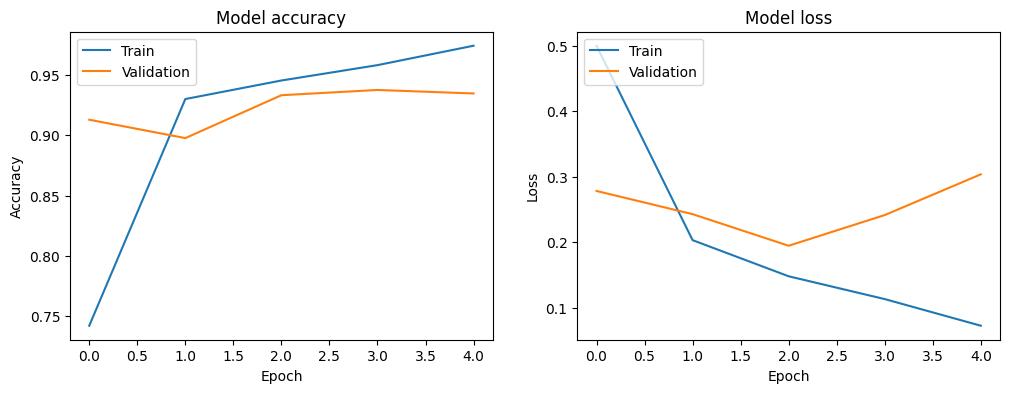

In [2]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


## Batch size 64

In [1]:
# Model Training

## 1. Load Preprocessed Dataset

import os
import tensorflow as tf
import tensorflow_datasets as tfds

# Clear Keras session
import tensorflow.keras.backend as K
K.clear_session()

# Define data directories
base_dir = '/tf/notebooks/malaria-image-recognition/'
data_dir = os.path.join(base_dir, 'data', 'raw')

# Load the dataset with TensorFlow Datasets
datasets, _info = tfds.load('malaria',
                            split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                            data_dir=data_dir,
                            shuffle_files=True,
                            download=True,
                            as_supervised=True,
                            with_info=True,
                           )

train_dataset, val_dataset, test_dataset = datasets

# Define image preprocessing functions
def preprocess_image(image, label):
    image = tf.image.resize(image, [128, 128])  # Resize images
    image = image / 255.0  # Rescale images
    return image, label

# Apply preprocessing, batching, and prefetching
batch_size = 64

train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

val_dataset = val_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = test_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

import tensorflow as tf

def lenet_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = lenet_model()
model.summary()

from time import perf_counter

start = perf_counter()

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5)  # Adjust the number of epochs as necessary

end = perf_counter()

print(f"Time elapsed: {end-start:.4f} seconds")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")



2024-07-17 06:49:52.569825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 06:49:52.592848: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 06:49:52.592884: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 06:49:52.607629: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-17 06:49:59.115088: I external/local_xla/xla

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 62, 62, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 29, 29, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,614,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,961 (6.21 MB)

 Trainable params: 1,627,961 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


I0000 00:00:1721199004.859841   23970 service.cc:145] XLA service 0x7d6124085010 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721199004.859880   23970 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-17 06:50:04.892569: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-17 06:50:05.063652: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1721199006.556958   24075 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_672', 112 bytes spill stores, 112 bytes spill loads

I0000 00:00:1721199008.678280   24072 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_601', 184 bytes spill stores, 144 bytes spill loads



  7/345 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.5169 - loss: 1.3529 

I0000 00:00:1721199011.982252   23970 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


343/345 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5917 - loss: 0.7107

I0000 00:00:1721199030.375419   24159 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_672', 64 bytes spill stores, 64 bytes spill loads



345/345 ━━━━━━━━━━━━━━━━━━━━ 34s 66ms/step - accuracy: 0.5922 - loss: 0.7101 - val_accuracy: 0.7881 - val_loss: 0.4891
Epoch 2/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8332 - loss: 0.3957 - val_accuracy: 0.9140 - val_loss: 0.2404
Epoch 3/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9195 - loss: 0.2131 - val_accuracy: 0.8999 - val_loss: 0.2731
Epoch 4/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9336 - loss: 0.1862 - val_accuracy: 0.9209 - val_loss: 0.2383
Epoch 5/5
345/345 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9457 - loss: 0.1632 - val_accuracy: 0.9314 - val_loss: 0.2203
Time elapsed: 62.7156 seconds
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9352 - loss: 0.2221
Test accuracy: 0.9375907182693481


## Batch Size of 128

In [1]:
# Model Training

## 1. Load Preprocessed Dataset

import os
import tensorflow as tf
import tensorflow_datasets as tfds

# Clear Keras session
import tensorflow.keras.backend as K
K.clear_session()

# Define data directories
base_dir = '/tf/notebooks/malaria-image-recognition/'
data_dir = os.path.join(base_dir, 'data', 'raw')

# Load the dataset with TensorFlow Datasets
datasets, _info = tfds.load('malaria',
                            split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                            data_dir=data_dir,
                            shuffle_files=True,
                            download=True,
                            as_supervised=True,
                            with_info=True,
                           )

train_dataset, val_dataset, test_dataset = datasets

# Define image preprocessing functions
def preprocess_image(image, label):
    image = tf.image.resize(image, [128, 128])  # Resize images
    image = image / 255.0  # Rescale images
    return image, label

# Apply preprocessing, batching, and prefetching
batch_size = 128

train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

val_dataset = val_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = test_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

import tensorflow as tf

def lenet_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = lenet_model()
model.summary()

from time import perf_counter

start = perf_counter()

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5)  # Adjust the number of epochs as necessary

end = perf_counter()

print(f"Time elapsed: {end-start:.4f} seconds")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")



2024-07-17 06:40:09.886326: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 06:40:09.909274: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 06:40:09.909317: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 06:40:09.923451: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-17 06:40:15.554973: I external/local_xla/xla

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 62, 62, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 29, 29, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,614,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,961 (6.21 MB)

 Trainable params: 1,627,961 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


I0000 00:00:1721198417.768639   20997 service.cc:145] XLA service 0x746408108240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721198417.768683   20997 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-17 06:40:17.802799: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-17 06:40:17.981214: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1721198421.548080   21086 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_363', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1721198422.553138   21087 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_601', 184 bytes spill stores, 144 bytes spill loads

I0000 00:0

  4/173 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.5308 - loss: 0.8991 

I0000 00:00:1721198427.432290   20997 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


171/173 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5661 - loss: 0.6911

I0000 00:00:1721198438.343061   21181 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_672', 64 bytes spill stores, 64 bytes spill loads



173/173 ━━━━━━━━━━━━━━━━━━━━ 30s 110ms/step - accuracy: 0.5671 - loss: 0.6902 - val_accuracy: 0.7569 - val_loss: 0.5410
Epoch 2/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.7869 - loss: 0.4687 - val_accuracy: 0.8342 - val_loss: 0.4214
Epoch 3/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9003 - loss: 0.2546 - val_accuracy: 0.9151 - val_loss: 0.2280
Epoch 4/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9299 - loss: 0.1966 - val_accuracy: 0.9300 - val_loss: 0.2132
Epoch 5/5
173/173 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9387 - loss: 0.1713 - val_accuracy: 0.9267 - val_loss: 0.2018
Time elapsed: 57.4452 seconds
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9299 - loss: 0.2066
Test accuracy: 0.9321480393409729


## Batch size of 256

In [1]:
# Model Training

## 1. Load Preprocessed Dataset

import os
import tensorflow as tf
import tensorflow_datasets as tfds

# Clear Keras session
import tensorflow.keras.backend as K
K.clear_session()

# Define data directories
base_dir = '/tf/notebooks/malaria-image-recognition/'
data_dir = os.path.join(base_dir, 'data', 'raw')

# Load the dataset with TensorFlow Datasets
datasets, _info = tfds.load('malaria',
                            split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                            data_dir=data_dir,
                            shuffle_files=True,
                            download=True,
                            as_supervised=True,
                            with_info=True,
                           )

train_dataset, val_dataset, test_dataset = datasets

# Define image preprocessing functions
def preprocess_image(image, label):
    image = tf.image.resize(image, [128, 128])  # Resize images
    image = image / 255.0  # Rescale images
    return image, label

# Apply preprocessing, batching, and prefetching
batch_size = 256

train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

val_dataset = val_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = test_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

import tensorflow as tf

def lenet_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = lenet_model()
model.summary()

from time import perf_counter

start = perf_counter()

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5)  # Adjust the number of epochs as necessary

end = perf_counter()

print(f"Time elapsed: {end-start:.4f} seconds")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")



2024-07-17 06:42:19.897947: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 06:42:19.921086: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 06:42:19.921132: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 06:42:19.935806: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-17 06:42:26.142064: I external/local_xla/xla

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 62, 62, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 29, 29, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,614,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,961 (6.21 MB)

 Trainable params: 1,627,961 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


I0000 00:00:1721198548.388889   21953 service.cc:145] XLA service 0x790bf4005140 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721198548.388942   21953 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-17 06:42:28.421956: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-17 06:42:28.597426: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1721198550.148222   22035 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_672', 104 bytes spill stores, 104 bytes spill loads

I0000 00:00:1721198552.199884   22033 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_601', 76 bytes spill stores, 72 bytes spill loads

I0000 00:0

 3/87 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5549 - loss: 0.7448 

I0000 00:00:1721198560.230004   21953 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


86/87 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5921 - loss: 0.6703

I0000 00:00:1721198569.491332   22121 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_672', 64 bytes spill stores, 64 bytes spill loads



87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.5926 - loss: 0.6698

I0000 00:00:1721198576.693077   22261 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_75', 108 bytes spill stores, 168 bytes spill loads

I0000 00:00:1721198577.414090   22259 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_75', 56 bytes spill stores, 56 bytes spill loads



87/87 ━━━━━━━━━━━━━━━━━━━━ 32s 216ms/step - accuracy: 0.5931 - loss: 0.6694 - val_accuracy: 0.7159 - val_loss: 0.5574
Epoch 2/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.7462 - loss: 0.5251 - val_accuracy: 0.8364 - val_loss: 0.3720
Epoch 3/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.8703 - loss: 0.3347 - val_accuracy: 0.8973 - val_loss: 0.2863
Epoch 4/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9008 - loss: 0.2495 - val_accuracy: 0.9078 - val_loss: 0.2864
Epoch 5/5
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9192 - loss: 0.2147 - val_accuracy: 0.9086 - val_loss: 0.2425
Time elapsed: 61.1625 seconds
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.9108 - loss: 0.2593
Test accuracy: 0.9140058159828186


## Batch size of 512

In [1]:
# Model Training

## 1. Load Preprocessed Dataset

import os
import tensorflow as tf
import tensorflow_datasets as tfds

# Clear Keras session
import tensorflow.keras.backend as K
K.clear_session()

# Define data directories
base_dir = '/tf/notebooks/malaria-image-recognition/'
data_dir = os.path.join(base_dir, 'data', 'raw')

# Load the dataset with TensorFlow Datasets
datasets, _info = tfds.load('malaria',
                            split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                            data_dir=data_dir,
                            shuffle_files=True,
                            download=True,
                            as_supervised=True,
                            with_info=True,
                           )

train_dataset, val_dataset, test_dataset = datasets

# Define image preprocessing functions
def preprocess_image(image, label):
    image = tf.image.resize(image, [128, 128])  # Resize images
    image = image / 255.0  # Rescale images
    return image, label

# Apply preprocessing, batching, and prefetching
batch_size = 512

train_dataset = train_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

val_dataset = val_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

test_dataset = test_dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

import tensorflow as tf

def lenet_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
        tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation='relu'),
        tf.keras.layers.Dense(84, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Assuming binary classification
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = lenet_model()
model.summary()

from time import perf_counter

start = perf_counter()

history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=5)  # Adjust the number of epochs as necessary

end = perf_counter()

print(f"Time elapsed: {end-start:.4f} seconds")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")



2024-07-17 06:44:23.188271: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 06:44:23.211158: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 06:44:23.211211: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 06:44:23.224938: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-17 06:44:29.218457: I external/local_xla/xla

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 124, 124, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 62, 62, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 58, 58, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 29, 29, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13456)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,614,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,627,961 (6.21 MB)

 Trainable params: 1,627,961 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


I0000 00:00:1721198671.664876   22908 service.cc:145] XLA service 0x7164a8408000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721198671.664949   22908 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-17 06:44:31.699086: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-17 06:44:31.874452: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1721198674.423867   22993 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_601', 76 bytes spill stores, 72 bytes spill loads

I0000 00:00:1721198675.191026   22991 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_601', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:

 2/44 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.4956 - loss: 0.9779 

I0000 00:00:1721198689.249117   22908 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5237 - loss: 0.8188

I0000 00:00:1721198696.463129   23094 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_672', 64 bytes spill stores, 64 bytes spill loads



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.5245 - loss: 0.8166

I0000 00:00:1721198703.096390   23239 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_75', 108 bytes spill stores, 168 bytes spill loads

I0000 00:00:1721198703.450084   23237 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_75', 56 bytes spill stores, 56 bytes spill loads



44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 361ms/step - accuracy: 0.5252 - loss: 0.8145 - val_accuracy: 0.6448 - val_loss: 0.6293
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.6406 - loss: 0.6255 - val_accuracy: 0.6898 - val_loss: 0.5907
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - accuracy: 0.7083 - loss: 0.5679 - val_accuracy: 0.7369 - val_loss: 0.5184
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.7853 - loss: 0.4575 - val_accuracy: 0.7729 - val_loss: 0.5112
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.8496 - loss: 0.3547 - val_accuracy: 0.8843 - val_loss: 0.3018
Time elapsed: 63.6001 seconds
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.8737 - loss: 0.3070
Test accuracy: 0.8777213096618652
